<span dir="rtl" style="font-family:B Nazanin" align="right">
    <h1>فصل پنجم: یادگیری ماشین</h1>
    <h2>بخش چهارم: طبقه‌بندی (Classification)</h2>
</span>

In [40]:
import warnings
warnings.filterwarnings('ignore')

<p style="font-family:B Nazanin">
    <b>الگوریتم بیز ساده یا Naive Bayes:</b><br>
    این الگوریتم فقط برای مسائل طبقه‌بندی کاربرد دارد و نمی‌تواند مسائل رگرسیون را پیش‌بینی کند. این الگوریتم بر پایه بیز یا همان احتمال شرطی کار می‌کند. تفاوت این الگوریتم با الگوریتم‌های دیگر این است که به جای این که پیش‌بینی کند که نمونه جدید مربوط به کدام کلاس است، احتمال این را پیش‌بینی می‌کند که این نمونه مربوط به چه کلاسی است. مسئله دوم این است که این الگوریتم ارتباط میان ویژگی‌ها را در نظر نمی‌گیرد و تمام ویژگی‌ها را مستقل فرض می‌کند (که همین مسئله یکی از عیوب این الگوریتم است). ضمن اینکه الگوریتم NB نسبت به داده‌های نویزی نیز بسیار حساس است. این الگوریتم قبلا در طبقه‌بندی متن، فیلتر کردن متن‌های اسپم، تحلیل احساسات از روی متن استفاده می‌شد اما در گذر زمان از آن در مسائل دیگر نیز استفاده می‌کنند. از مزایای این الگوریتم می‌توان به این موارد اشاره کرد: سرعت نسبتا بالایی دارد. پیاده‌سازی آن ساده است و روی داده‌های با ابعاد بالا خوب عمل می‌کند. در این الگوریتم احتمال اینکه یک نمونه مربوط به یک کلاس باشد از فرمول زیر محاسبه می‌شود: 
</p>

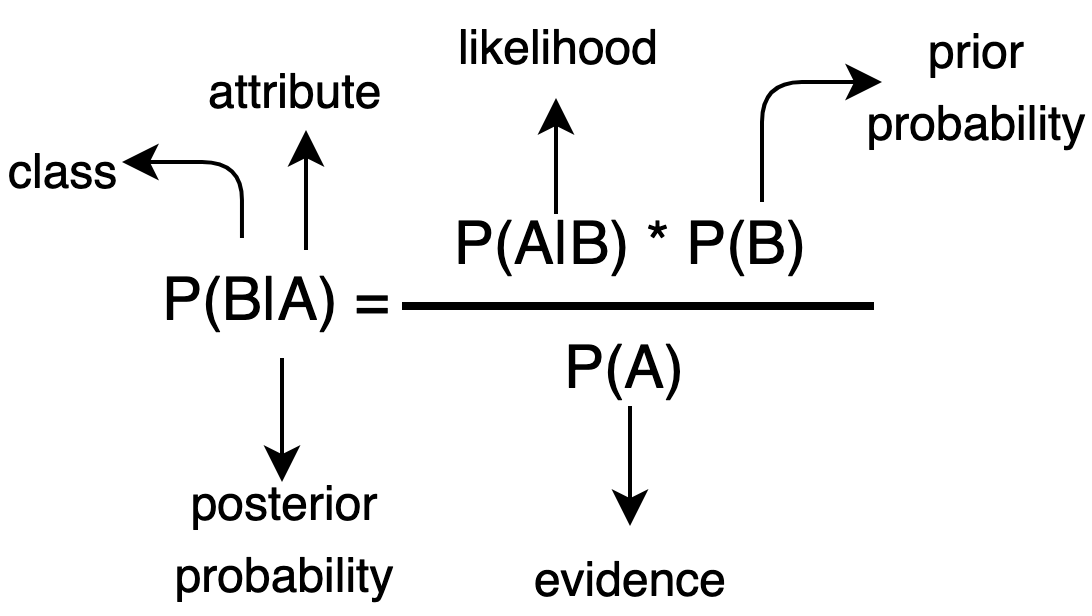

<p style="font-family:B Nazanin">
      اگر فرض کنیم دیتاستی داریم برگزاری بازی گلف در شرایط مختلف آب‌وهوایی را مشخص کند، اگر A نشان‌دهنده آفتابی بودن هوا و B‌نشان‌دهنده برگزاری بازی باشد، $P(B|A)$ نشان‌دهنده احتمال این است که بازی برگزار شود به شرط اینکه هوا آفتابی باشد. $P(A|B)$ نشان‌دهنده این است که در چند درصد مواقع بازی انجام شده و هوا آفتابی بوده است. $P(B)$ نشان‌دهنده این است که در چند درصد مواقع بازی انجام شده است و $P(A)$ نشان‌دهنده این است که در چند درصد مواقع هوا آفتابی بوده است. <br>
    دیتاست عکس زیر داده‌های مربوط به 14 بازی گلف را مشخص کرده است.
</p>

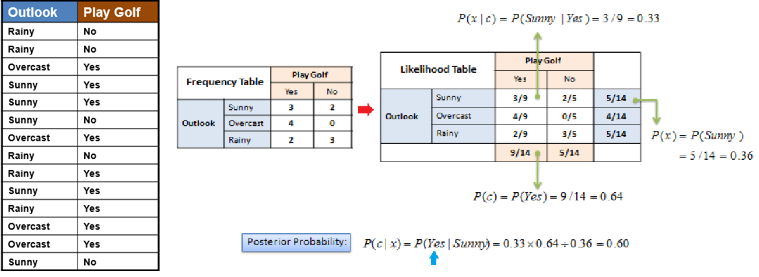

<p style="font-family:B Nazanin">
      در مجموع 9 بازی برگزار شده است که در 3 مورد از آن‌ها هوا آفتابی بوده است. پس درصد احتمال آفتابی بودن هوا به شرط برگزاری بازی برابر است با $P(A|B) = \frac{3}{9} = 0.33$. از مجموع 14 بازی، 9 بازی انجام شده است. پس احتمال برگزاری بازی برابر است با $P(B) = \frac{9}{14} = 0.64$. از مجموع 14 بازی، در 5 مورد هوا آفتابی بوده است. پس احتمال آفتابی بودن هوا می‌شود $P(A) = \frac{5}{14} = 0.36$. بنابراین مطابق با الگوریتم بیز ساده، اگر هوا آفتابی باشد، احتمال اینکه بازی برگزار شود برابر است با:
</p>

$$
P(B|A) = \frac{P(A|B) \times P(B)}{P(A)} = \frac{0.33 \times 0.64}{0.36} = 0.60
$$

<p style="font-family:B Nazanin">
      پس 60 درصد احتمال دارد اگر هوا آفتابی باشد، بازی برگزار شود.
</p>

<p style="font-family:B Nazanin">
    <b>انواع طبقه‌بندی Naive Bayes:</b> بر اساس این که ویژگی‌های مسئله از چه نوعی هستند و از چه توزیعی پیروی می‌کنند، از یکی از سه روش زیر برای محاسبه احتمال وجود یک نمونه در یک کلاس استفاده می‌کنیم:<br>
    * Gaussian: اگر اکثریت ویژگی‌های موجود در یک دیتاست، از توزیع نرمال پیروی کنند و داده‌های پیوسته باشند، از روش Gaussian استفاده می‌کنیم. <br>
    * Multinomial: اگر داده‌های مربوط به ویژگی‌ها از جنس گسسته و شمارشی بودند، از روش Multinomial استفاده می‌کنیم. <br>
    * Bernouli: زمانی که داده‌ها به حالت دودویی باشند و توزیع داده‌ها از نوع برنولی باشد، از روش Bernouli استفاده می‌کنیم.
</p>

<p style="font-family:B Nazanin">
      مثال. در این دیتاست سن، جنسیت و درآمد افراد وجود دارد و مشخص شده است که خرید اتفاق می‌افتد یا خیر.
</p>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./datasets/Social_Network_Ads_By_Gender.csv')
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
df.shape

(400, 4)

In [5]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


<p style="font-family:B Nazanin">
      با توجه به اینکه اکثر داده‌های ما به صورت عددی و پیوسته است، از روش گاوسی (Gaussian) استفاده می‌کنیم.
</p>

In [6]:
X = df.iloc[:, [0, 1,2]]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [9]:
print(f"Accuracy:{accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Accuracy:0.925
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        58
           1       0.90      0.82      0.86        22

    accuracy                           0.93        80
   macro avg       0.92      0.89      0.90        80
weighted avg       0.92      0.93      0.92        80

Confusion Matrix:
[[56  2]
 [ 4 18]]


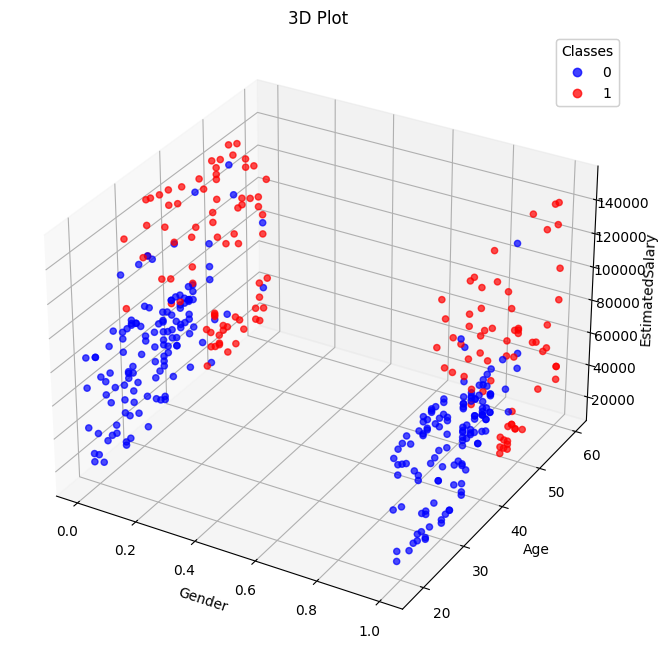

In [10]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Gender'], df['Age'], df['EstimatedSalary'], c=df['Purchased'], cmap='bwr', alpha=0.7)ررر
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
ax.set_title('3D Plot')
ax.set_xlabel('Gender')
ax.set_ylabel('Age')
ax.set_zlabel('EstimatedSalary')
plt.show()

<p style="font-family:B Nazanin">
      مثال. در این مثال می‌خواهیم روش برنولی را بررسی کنیم. دیتاستی می‌سازیم که دو ویژگی داشته باشد و ستون هدف آن با yes و no پر شود.
</p>

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
num_samples = 10000
X = np.random.randint(2, size=(num_samples, 2))
y = np.random.choice(['yes', 'no'], size=num_samples)

In [13]:
df = pd.DataFrame(X, columns=['feature1', 'feature2'])
y = np.where(y == 'yes', 1, 0)
df['target'] = y
df.head()

,feature1,feature2,target
0,0,0,0
1,0,1,0
2,0,1,1
3,1,1,0
4,0,1,0


In [14]:
df['target'].value_counts()

0    5045
1    4955
Name: target, dtype: int64

In [16]:
y_binary = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

In [17]:
model = BernoulliNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [18]:
print(f"Accuracy:{accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Accuracy:0.49433333333333335
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.74      0.59      1489
           1       0.50      0.25      0.33      1511

    accuracy                           0.49      3000
   macro avg       0.49      0.50      0.46      3000
weighted avg       0.49      0.49      0.46      3000

Confusion Matrix:
[[1104  385]
 [1132  379]]


<p style="font-family:B Nazanin">
      به خاطر تعادل بسیار زیاد داده‌ها و دودویی بودن ویژگی‌ها، می‌بینیم که درصد دقت مدل بسیار پایین است. <br>
    مثال. دیتابیسی داریم که برای تشخیص ایمیل‌های اسپم ایجاد شده است. در این دیتابیس ایمیل‌های مختلفی بررسی شده و از جملات آن، کلمات و تعداد تکرار آن کلمات به دست آمده است. ستون‌های این دیتاست، کلمات هستند و مقادیر موجود در دیتاست، تعداد تکرار هر کلمه در هر نمونه. ستون هدف نیز مشخص می‌کند که ایمیل اسپم هست یا خیر. در این دیتاست، داده‌ها از جنس اعداد شمارشی گسسته هستند. پس از روش چندجمله‌ای استفاده می‌کنیم.
</p>

In [19]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
df = pd.read_csv('./datasets/Generated_Dataset_Words.csv')
df.head()

,hello,world,email,free,offer,buy,win,prize,meeting,discount,money,urgent,target
0,0,0,0,0,0,0,1,0,1,0,0,1,1.0
1,1,0,1,0,1,0,0,1,0,0,0,0,1.0
2,1,0,1,0,0,0,1,1,1,1,1,0,1.0
3,0,1,0,0,1,1,1,1,1,1,1,0,0.0
4,0,1,0,1,1,0,1,1,0,1,1,0,1.0


In [21]:
df.shape

(1000, 13)

In [24]:
df.columns

Index(['hello', 'world', 'email', 'free', 'offer', 'buy', 'win', 'prize',
       'meeting', 'discount', 'money', 'urgent', 'target'],
      dtype='object')

In [22]:
df.dtypes

hello         int64
world         int64
email         int64
free          int64
offer         int64
buy           int64
win           int64
prize         int64
meeting       int64
discount      int64
money         int64
urgent        int64
target      float64
dtype: object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hello     1000 non-null   int64  
 1   world     1000 non-null   int64  
 2   email     1000 non-null   int64  
 3   free      1000 non-null   int64  
 4   offer     1000 non-null   int64  
 5   buy       1000 non-null   int64  
 6   win       1000 non-null   int64  
 7   prize     1000 non-null   int64  
 8   meeting   1000 non-null   int64  
 9   discount  1000 non-null   int64  
 10  money     1000 non-null   int64  
 11  urgent    1000 non-null   int64  
 12  target    1000 non-null   float64
dtypes: float64(1), int64(12)
memory usage: 101.7 KB


In [25]:
df['target'].value_counts()

1.0    700
0.0    300
Name: target, dtype: int64

In [26]:
X=df.drop(['target'],axis=1)
y=df['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [27]:
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
y_pred = MNB.predict(X_test)

In [28]:
print(f"Accuracy:{accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Accuracy:0.68
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        64
         1.0       0.68      1.00      0.81       136

    accuracy                           0.68       200
   macro avg       0.34      0.50      0.40       200
weighted avg       0.46      0.68      0.55       200

Confusion Matrix:
[[  0  64]
 [  0 136]]


In [29]:
test_sample=np.array([[1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0]])
test_sample_pred=MNB.predict(test_sample)
print(f"Classification of test sample : {test_sample_pred[0]}")

Classification of test sample : 1.0


<p style="font-family:B Nazanin">
    <b>الگوریتم Boosting:</b>
    قبلا در مورد الگوریتم‌های یادگیری جمعی توضیح دادیم که داده‌ها را به چندین مدل می‌داد و نتیجه پیش‌بینی آن‌ها را با هم تجمیع می‌کرد و پیش‌بینی نهایی را مشخص می‌کرد که یکی از این الگوریتم‌ها Boosting است. به طور کلی الگوریتم‌های یادگیری جمعی به دو دسته تقسیم می‌شوند: الگوریتم‌های همگن که در آن‌ها تمام مدل‌های استفاده‌شده در آن یکسان است و الگوریتم‌های غیرهمگن که در آن از مدل‌های مختلف استفاده می‌شود. الگوریتم Boosting یکی از انواع الگوریتم‌های همگن است. 
</p>

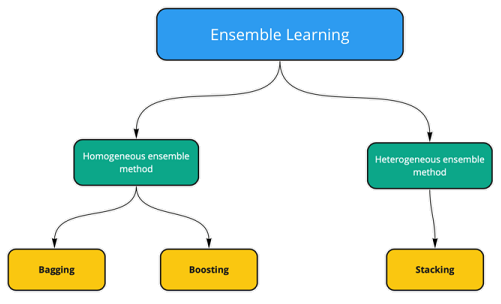

<p style="font-family:B Nazanin">
      الگوریتم Boosting یک فرایند تقویتی را انجام می‌دهد. به این ترتیب که در هر مرحله از یک یادگیرنده ضعیف استفاده می‌کند و در مراحل بعدی آن یادگیرنده ضعیف را تقویت می‌کند و مشکلاتش را برطرف می‌کند تا به یک مدل قوی‌تر تبدیل شود. مطابق با شکل زیر، این الگوریتم از چند مدل ضعیف‌تر تشکیل می‌شود. داده‌های آموزشی به مدل ضعیف اول داده می‌شود و بعد از تست، مشکلات آن مشخص می‌شود. سپس این مشکلات به مرحله دوم منتقل می‌شود و مدل مرحله دوم سعی می‌کند تا مشکلات قبلی را برطرف کند. به همین ترتیب این مراحل پیش می‌رود تا در نهایت به مدل قوی و دقیقی برسیم. 
</p>

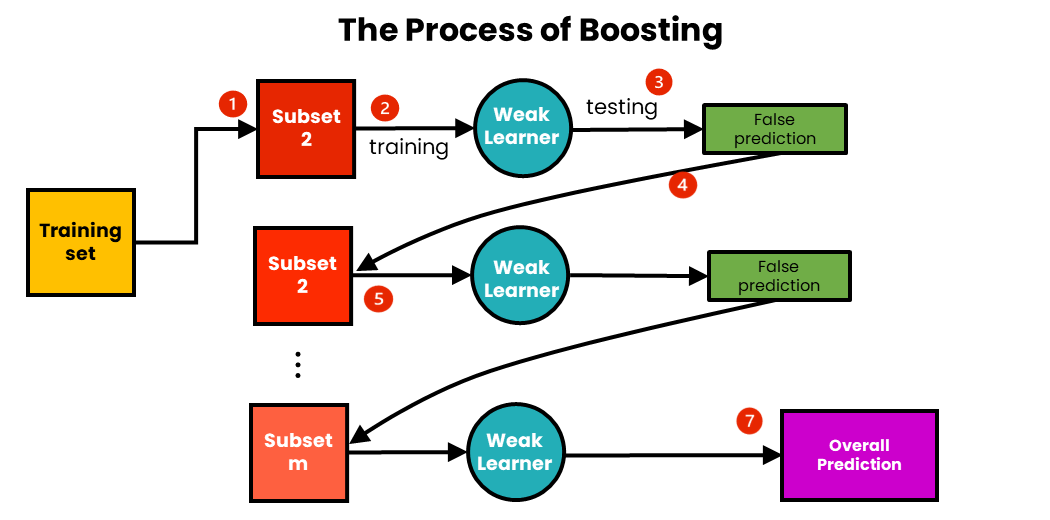

<p style="font-family:B Nazanin">
      به عنوان مثال برای تشخیص یک ایمیل اسپم، مدل اول یاد گرفته است که اگر یک ایمیل شامل فقط عکس بود اسپم است. مدل دوم نیز یاد گرفته است که اگر ایمیل شامل لینک بود، اسپم است و به همین ترتیب تا آخر و مدل آخر یاد گرفته است که اگر ایمیل از طرف یک فرستنده معتبر باشد، اسپم نیست. هر کدام از این مدل‌ها به تنهایی برای پیش‌بینی دقیق، ضعیف هستند اما در کنار هم می‌توانند از اطلاعات و یادگیری یکدیگر استفاده کنند و مدل دقیقی را تشکیل دهند. <br>
    تفاوت الگوریتم Boosting و Bagging در اینجاست که در الگوریتم Boosting، مدل‌ها به صورت سری اجرا می‌شوند و از اطلاعات مدل قبلی نیز استفاده می‌کنند اما در الگوریتم Bagging، دیتاست اولیه به شکل‌های مختلف (بوت‌استرپ) به مدل‌ها داده می‌شود و مدل‌ها به صورت موازی اجرا می‌شوند و در نهایت پیش‌بینی آن‌ها تجمیع می‌شود. یعنی در واقع Boosting سعی می‌کند با ترکیب مدل‌های ضعیف، مدل اصلی خود را قوی‌تر کند اما الگوریتم Bagging قصد دارد تا با ترکیب خروجی مدل‌هایش، مقدار واریانس را کاهش دهد. مورد دیگر اینکه تمرکز اصلی Boosting روی نمونه‌های مشکل‌ساز است. یعنی در هر مرحله مدل سعی می‌کند خطاهای مدل قبلی را بیشتر ببیند و به آن خطاها وزن بیشتری می‌دهد تا آن‌ها را بهتر پیدا کند اما در حالت Bagging تمرکز بر روی کاهش واریانس است. 
</p>

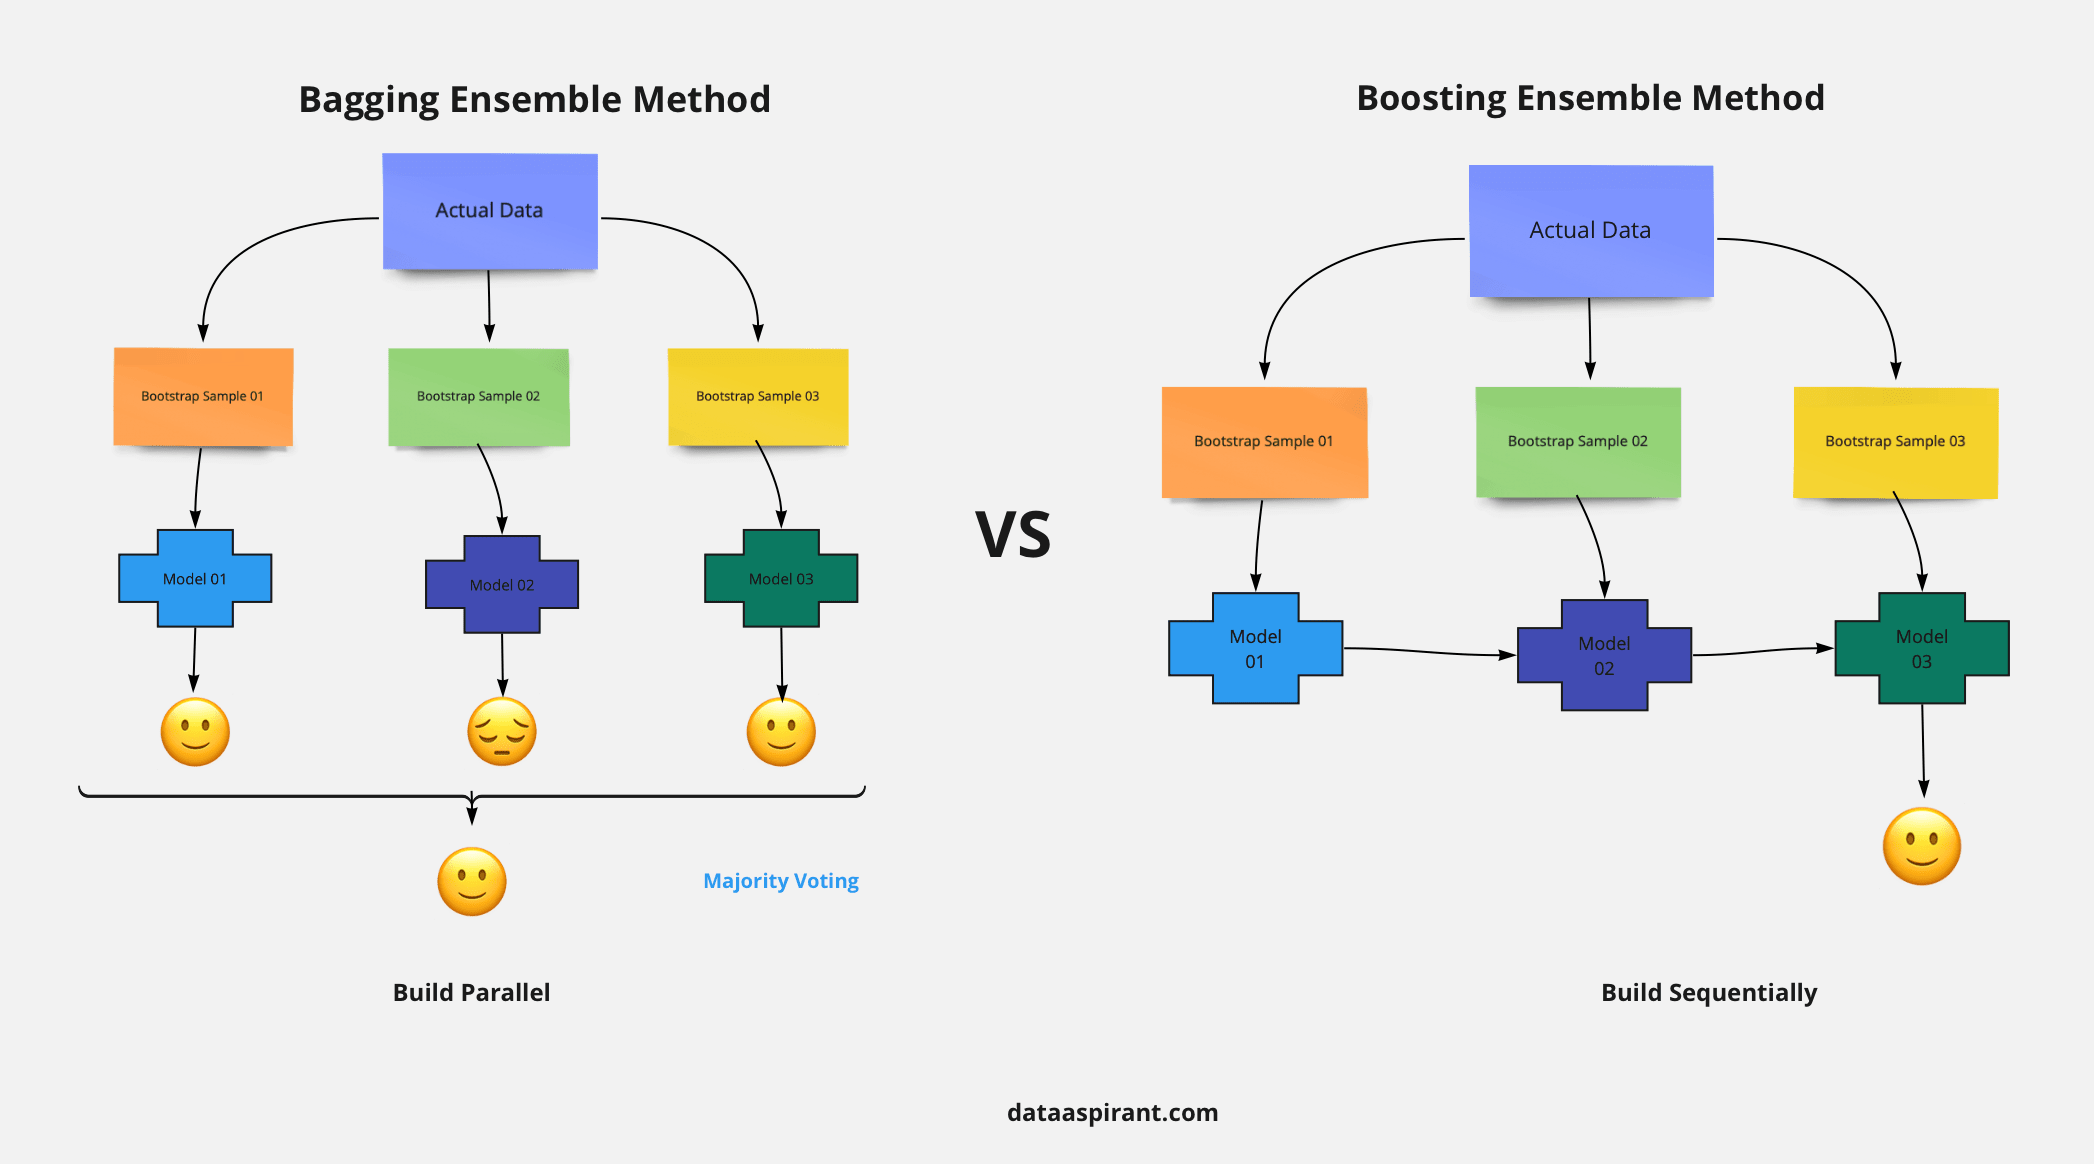

<p style="font-family:B Nazanin">
    <b>انواع الگوریتم‌های Boosting:</b><br>
    پنج مورد از مهم‌ترین و پرکاربردترین الگوریتم‌هایی که از روش Boosting استفاده می‌کنند عبارتند از:
</p>

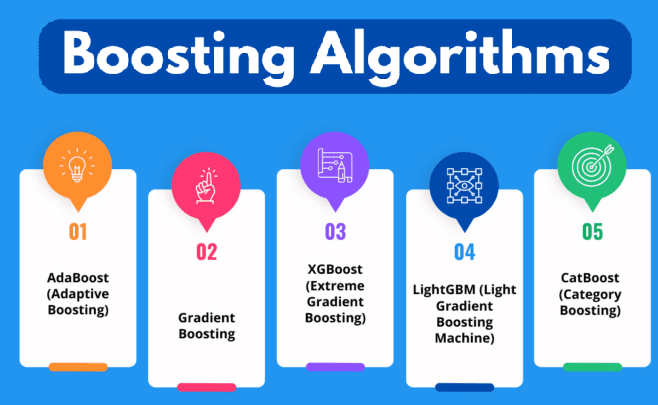

<p style="font-family:B Nazanin">
    <b>1. الگوریتم AdaBoost یا Adaptive Boosting:</b><br>
    در این الگوریتم در هر مرحله مدل سعی می‌کند که اشتباهات مدل مرحله قبل را یافته و به آن‌ها وزن بدهد و به آن‌ها بیشتر دقت کند. به عنوان مثال، همان طور که در تصویر زیر دیده می‌شود، می‌خواهیم نواحی مثبت و منفی را از یکدیگر تشخیص دهیم. در ابتدا دیتاست به مدل اول داده می‌شود، و مدل اول یک خط افقی رسم می‌کند. در این مدل سه مورد از نمونه‌ها (یک مثبت و دو منفی) دارای خطا هستند. سپس مدل دوم همان دیتاست اولیه را می‌گیرد و سعی می‌کند به این سه نمونه وزن بیشتری دهد (در شکل این نمونه‌ها بزرگ‌تر نشان داده شده‌اند). مدل دوم با بررسی دیتاست و تمرکز بیشتر روی این سه نمونه سعی می‌کند که جداسازی نواحی را انجام دهد. بدین ترتیب یک خط عمودی رسم می‌کند. در اینجا نیز می‌بینیم که سه نمونه منفی دارای خطا هستند. مجددا این اطلاعات به مدل سوم داده می‌شود و مدل سوم این بار به این نمونه‌ها وزن بیشتری می‌دهد و خط رسم‌شده، خطی عمودی  است. در نهایت تجمیع این سه مدل شکل نهایی را حاصل می‌کند که بدون خطا تمامی نواحی مثبت و منفی را تفکیک کرده است. 
</p>

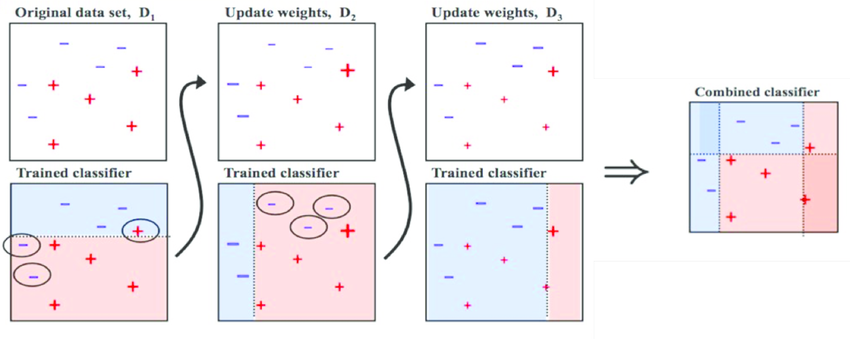

<p style="font-family:B Nazanin">
      این الگوریتم برای مسائل طبقه‌بندی دودویی بسیار قدرتمند است البته که می‌توانیم در سطح‌های دیگر نیز از آن استفاده کنیم. معمولا مدل‌هایی که در مراحل مختلف این الگوریتم ساخته می‌شوند، به کمک درخت تصمیم عمل یادگیری را انجام می‌دهند.
</p>

<p style="font-family:B Nazanin">
    <b>2. الگوریتم Gradient Boosting:</b><br>
    این الگوریتم هم برای مسائل رگرسیون و هم طبقه‌بندی خوب عمل می‌کند. این الگوریتم سعی می‌کند در هر مرحله به کمک روش گرادیان کاهشی، سعی می‌کند خطای تابع هزینه مرحله قبل را کم کند. مطابق تصویر زیر، در هر مرحله یک پیش‌بینی انجام می‌شود و تابع هزینه محاسبه می‌شود و مرحله بعد سعی می‌کند با تغییراتی این تابع هزینه را کاهش دهد تا در نهایت به یک پیش‌بینی مناسب و با دقت بالا و کمترین هزینه برسیم. مزیت این روش این است که می‌توانیم از مدل‌ها و الگوریتم‌های قوی‌تر و پیچیده‌تری به عنوان مدل‌های ضعیف (weak learner) استفاده کنیم. 
</p>

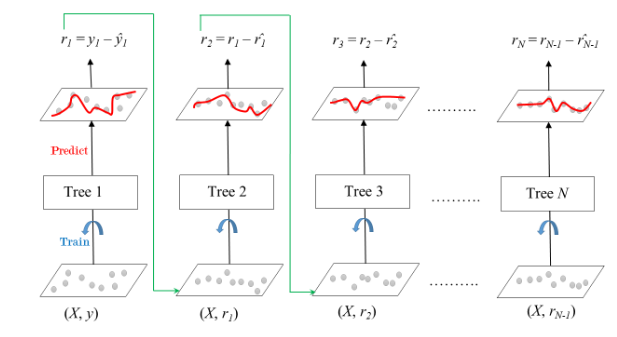

<p style="font-family:B Nazanin">
     <b>3. الگوریتم XGBoost یا Extreme Gradient Boosting:</b><br>
         این الگوریتم توسعه‌یافته روش Gradient Boosting است که امروزه بسیار پرکاربرد است. امکاناتی که این الگوریتم در اختیار ما می‌گذارد عبارتند از:<br>
         * امکان موازی‌سازی درختان: می‌تواند به صورت موازی درخت‌های تصمیم را پیاده‌سازی کند که به بالا رفتن سرعت کمک می‌کند. <br>
         * امکان هرس کردن درختان را جهت کنترل عمق درخت فراهم می‌کند. <br>
         * می‌تواند حافظه پنهان (cache) فراهم کند که سرعت محاسبات را بالا می‌برد. <br>
         * این الگوریتم درون خود امکان استفاده از تکنیک‌های منظم‌سازی را دارد تا از overfitting جلوگیری کند. <br>
         * به سادگی می‌تواند با داده‌های خالی یا گمشده (missing data) کار کند. <br>
         * درون خود امکان cross validation داخلی دارد.
</p>

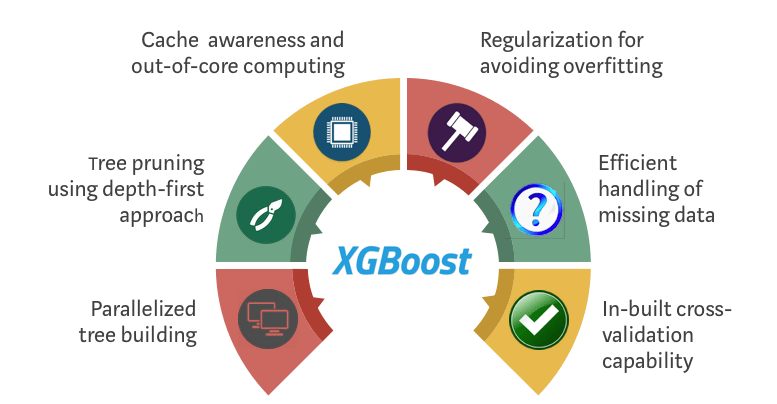

<p style="font-family:B Nazanin">
    <b>4. الگوریتم LightGBM یا Light Gradient Boosting Machine:</b><br>
    این الگوریتم نیز بر پایه Gradient Boosting است که به جای اینکه در سطح درخت توسعه ایجاد کند، در برگ توسعه را ایجاد می‌کند. یعنی رشد برگ محور تصمیم‌گیری درخت‌هاست. به همین دلیل مدل‌های دقیق‌تری ایجاد می‌شود. امکانات داخلی مانند تکنیک‌های منظم‌سازی، جلوگیری از overfitting، سرعت بالا، مناسب برای داده‌های خیلی بزرگ و مصرف حافظه کم دارد. در مقایسه با XGBoost سرعت بالاتر و مصرف حافظه کمتری دارد. اما دقت عملکرد XGBoost خیلی بالاتر است. این الگوریتم برای کار کردن با داده‌های دسته‌ای خیلی خوب عمل می‌کند. 
</p>

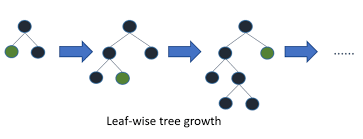

<p style="font-family:B Nazanin">
    <b>5. الگوریتم CatBoost یا Category Boosting:</b><br>
    این الگوریتم می‌تواند با داده‌های دسته‌ای (Categorical) کار کند و به صورت داخلی از این داده‌ها پشتیبانی می‌کند و دیگر نیازی نیست که در مرحله پیش‌پردازش، داده‌های دسته‌ای را به عددی تبدیل کنیم. همین کار باعث می‌شود که سرعت نسبتا بالایی داشته باشد. 
</p>

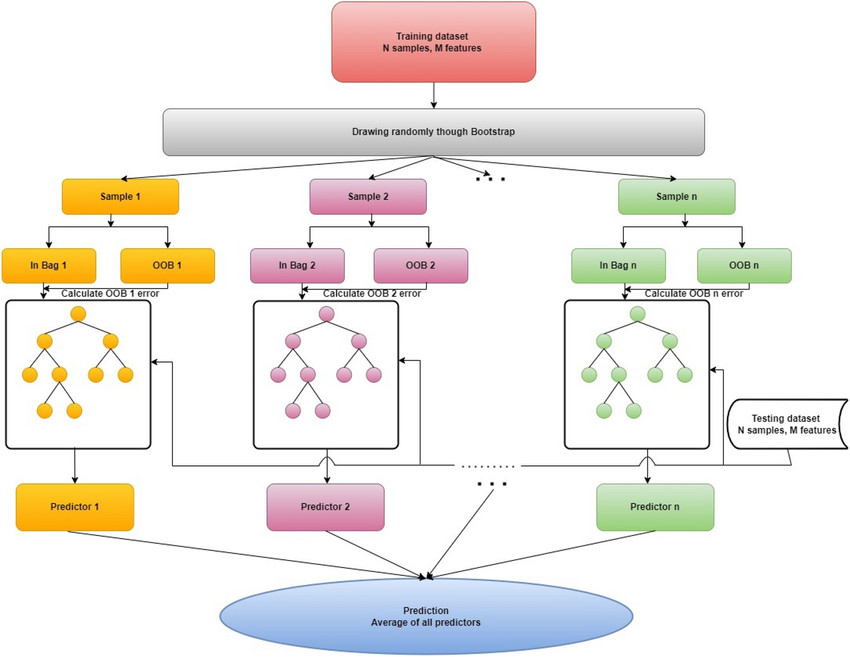

<p style="font-family:B Nazanin">
      مثال. می‌خواهیم روی دیتاست Iris الگوریتم AdaBoost را اجرا کنیم. ولی برای مقایسه ابتدا با یک درخت تصمیم میزان دقت را اندازه می‌گیریم و سپس با AdaBoost مقایسه می‌کنیم.
</p>

In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

dataset = load_iris()
X=dataset.data
y=dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


dt_clf = DecisionTreeClassifier(max_depth=1)
dt_clf.fit(X_train, y_train)
y_pred=dt_clf.predict(X_test)
print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))
print("accuracy_score:", accuracy_score(y_test, y_pred))
print("recall_score:", recall_score(y_test, y_pred,average='micro'))
print("precision_score:", precision_score(y_test, y_pred,average='micro'))
print(f"\nClassification Report:\n{classification_report(y_test, y_pred )}")

confusion_matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0 11  0]]
accuracy_score: 0.6333333333333333
recall_score: 0.6333333333333333
precision_score: 0.6333333333333333

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.45      1.00      0.62         9
           2       0.00      0.00      0.00        11

    accuracy                           0.63        30
   macro avg       0.48      0.67      0.54        30
weighted avg       0.47      0.63      0.52        30



<p style="font-family:B Nazanin">
      مدل AdaBoost را می‌سازیم و مدل پایه آن را درخت تصمیم و تعداد این مدل‌ها را 100 عدد تنظیم می‌کنیم.
</p>

In [31]:
ada_clf = AdaBoostClassifier(base_estimator=dt_clf,n_estimators=100)
ada_clf.fit(X_train, y_train)
y_pred=ada_clf.predict(X_test)
print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))
print("accuracy_score:", accuracy_score(y_test, y_pred))
print("recall_score:", recall_score(y_test, y_pred,average='micro'))
print("precision_score:", precision_score(y_test, y_pred,average='micro'))
print(f"\nClassification Report:\n{classification_report(y_test, y_pred )}")

confusion_matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy_score: 1.0
recall_score: 1.0
precision_score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<p style="font-family:B Nazanin">
      همان طور که می‌بینیم میزان دقت از 0.63 که بسیار پایین است، به عدد 1 رسیده است که دقت کامل است.<br>
    مثال. یک دیتاست تصادفی ایجاد می‌کنیم و الگوریتم AdaBoost را روی آن اجرا می‌کنیم و با نتیجه درخت تصمیم مقایسه می‌کنیم.
</p>

In [32]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_clf=DecisionTreeClassifier(max_depth=1)
dt_clf.fit(X_train, y_train)
y_pred=dt_clf.predict(X_test)
print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))
print("accuracy_score:", accuracy_score(y_test, y_pred))
print("recall_score:", recall_score(y_test, y_pred,average='micro'))
print("precision_score:", precision_score(y_test, y_pred,average='micro'))
print(f"\nClassification Report:\n{classification_report(y_test, y_pred )}")

confusion_matrix:
 [[73 16]
 [16 95]]
accuracy_score: 0.84
recall_score: 0.84
precision_score: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        89
           1       0.86      0.86      0.86       111

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [33]:
ada_clf =AdaBoostClassifier( n_estimators=50, learning_rate=1.0, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred=ada_clf.predict(X_test)

print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))
print("accuracy_score:", accuracy_score(y_test, y_pred))
print("recall_score:", recall_score(y_test, y_pred,average='micro'))
print("precision_score:", precision_score(y_test, y_pred,average='micro'))
print(f"\nClassification Report:\n{classification_report(y_test, y_pred )}")

confusion_matrix:
 [[83  6]
 [18 93]]
accuracy_score: 0.88
recall_score: 0.88
precision_score: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        89
           1       0.94      0.84      0.89       111

    accuracy                           0.88       200
   macro avg       0.88      0.89      0.88       200
weighted avg       0.89      0.88      0.88       200



<p style="font-family:B Nazanin">
      دقت از 0.84 به 0.88 افزایش یافته است.<br>
    مثال. می‌خواهیم روی دیتاست breast cancer موجود در sklearn، الگوریتم Gradient Boosting را اجرا کنیم.
</p>

In [34]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

dataset = load_breast_cancer()
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_clf=DecisionTreeClassifier(max_depth=1)
dt_clf.fit(X_train, y_train)
y_pred=dt_clf.predict(X_test)
print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))
print("accuracy_score:", accuracy_score(y_test, y_pred))
print("recall_score:", recall_score(y_test, y_pred,average='micro'))
print("precision_score:", precision_score(y_test, y_pred,average='micro'))
print(f"\nClassification Report:\n{classification_report(y_test, y_pred )}")

confusion_matrix:
 [[39  4]
 [ 8 63]]
accuracy_score: 0.8947368421052632
recall_score: 0.8947368421052632
precision_score: 0.8947368421052632

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        43
           1       0.94      0.89      0.91        71

    accuracy                           0.89       114
   macro avg       0.89      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114



In [35]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))
print("accuracy_score:", accuracy_score(y_test, y_pred))
print("recall_score:", recall_score(y_test, y_pred,average='micro'))
print("precision_score:", precision_score(y_test, y_pred,average='micro'))
print(f"\nClassification Report:\n{classification_report(y_test, y_pred )}")

confusion_matrix:
 [[40  3]
 [ 2 69]]
accuracy_score: 0.956140350877193
recall_score: 0.956140350877193
precision_score: 0.956140350877193

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



<p style="font-family:B Nazanin">
      دقت از 0.89 به 0.956 افزایش یافته است. اگر اهمیت ویژگی‌ها را بررسی کنیم:
</p>

In [36]:
feature_importance = gb_clf.feature_importances_
features = dataset.feature_names
indices = np.argsort(feature_importance)[::-1]
for index in indices:
  print(f"{features[index]} => {feature_importance[index]}")

mean concave points => 0.4504129088729589
worst concave points => 0.24020942863002895
worst radius => 0.07569926531496506
worst perimeter => 0.05094545689993746
worst texture => 0.03988648003422685
worst area => 0.03862933434578755
mean texture => 0.027820649617072868
worst concavity => 0.017576496098358825
concavity error => 0.012682083964785576
area error => 0.009561765932227958
radius error => 0.00651307886296566
worst smoothness => 0.004882347903385486
fractal dimension error => 0.004312699318689661
mean compactness => 0.00383963084400493
texture error => 0.0034879519835104597
compactness error => 0.002868359144368925
mean smoothness => 0.0024799135103743862
concave points error => 0.0020711913365791747
worst symmetry => 0.001504246766942711
mean concavity => 0.0011435187169801162
symmetry error => 0.0007053152925326321
smoothness error => 0.0006691484136560025
mean area => 0.0005038792646261513
mean symmetry => 0.0004635029320180942
worst compactness => 0.00045012158464116994
peri

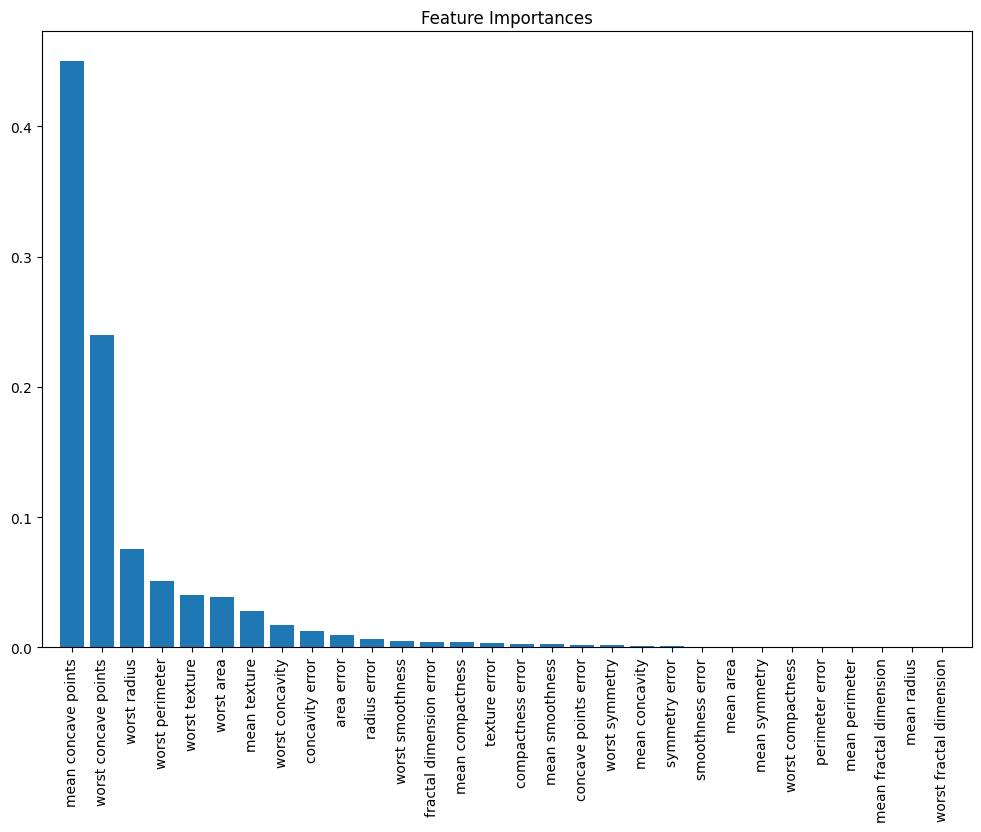

In [37]:
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importance[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

<p style="font-family:B Nazanin">
      مثال. الگوریتم XGBoost روی دیتاست Breast Cancer.
</p>

In [41]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 196.9 kB/s eta 0:10:35
   ---------------------------------------- 0.1/124.9 MB 328.6 kB/s eta 0:06:20
   ---------------------------------------- 0.1/124.9 MB 393.8 kB/s eta 0:05:17
   ---------------------------------------- 0.2/124.9 MB 619.5 kB/s eta 0:03:22
   ---------------------------------------- 0.3/124.9 MB 842.9 kB/s eta 0:02:28
   ---------------------------------------- 0.4/124.9 MB 1.1 MB/s eta 0:01:54
   ---------------------------------------- 0.5/124.9 MB 1.2 MB/s eta 0:01:41
   ---------------------------------------- 0.7/124.9 MB 1.4 MB/s eta 0:01:28
   ---------------------------------------- 0.8/124.9 MB 1.5 MB/s eta 0:01:22
   ---------------------------------------- 0.8/124.9 MB 1.5 MB/s eta 0:01:


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

dataset = load_breast_cancer()
X = dataset.data
y = dataset.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))
print("accuracy_score:", accuracy_score(y_test, y_pred))
print("recall_score:", recall_score(y_test, y_pred,average='micro'))
print("precision_score:", precision_score(y_test, y_pred,average='micro'))
print(f"\nClassification Report:\n{classification_report(y_test, y_pred )}")

confusion_matrix:
 [[40  3]
 [ 2 69]]
accuracy_score: 0.956140350877193
recall_score: 0.956140350877193
precision_score: 0.956140350877193

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



<p style="font-family:B Nazanin">
      مثال. الگوریتم XGBoost روی دیتاست Iris.
</p>

In [43]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

dataset = load_iris()
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))
print("accuracy_score:", accuracy_score(y_test, y_pred))
print("recall_score:", recall_score(y_test, y_pred,average='micro'))
print("precision_score:", precision_score(y_test, y_pred,average='micro'))
print(f"\nClassification Report:\n{classification_report(y_test, y_pred )}")

confusion_matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy_score: 1.0
recall_score: 1.0
precision_score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<p style="font-family:B Nazanin">
      مثال. الگوریتم LightGBM روی دیتاست wine از ماژول sklearn.
</p>

In [44]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.4 MB 882.6 kB/s eta 0:00:02
   ----------------------------- ---------- 1.0/1.4 MB 1.1 MB/s eta 0:00:01
   ----------------------------- ---------- 1.0/1.4 MB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 1.1 MB/s eta 0:00:00


In [45]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,recall_score,precision_score
import matplotlib.pyplot as plt

dataset = load_wine()
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lgb_clf = LGBMClassifier(feature_pre_filter=False)
lgb_clf.fit(X_train, y_train)
y_pred = lgb_clf.predict(X_test)

print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))
print("accuracy_score:", accuracy_score(y_test, y_pred))
print("recall_score:", recall_score(y_test, y_pred,average='micro'))
print("precision_score:", precision_score(y_test, y_pred,average='micro'))
print(f"\nClassification Report:\n{classification_report(y_test, y_pred )}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 142, number of used features: 13
[LightGBM] [Info] Start training from score -1.149165
[LightGBM] [Info] Start training from score -0.912776
[LightGBM] [Info] Start training from score -1.266948
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

<p style="font-family:B Nazanin">
      مثال. الگوریتم CatBoost روی دیتاست wine از ماژول sklearn.
</p>

In [46]:
!pip install catboost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/101.7 MB ? eta -:--:--
   ---------------------------------------- 1.0/101.7 MB 2.3 MB/s eta 0:00:45
    --------------------------------------- 1.6/101.7 MB 2.4 MB/s eta 0:00:42
    --------------------------------------- 1.8/101.7 MB 2.2 MB/s eta 0:00:45
    --------------------------------------- 2.1/101.7 MB 1.9 MB/s eta 0:00:54
   - -------------------------------------- 2.6/101.7 MB 2.1 MB/s eta 0:00:48
   - -------------------------------------- 3.4/101.7 MB 2.3 MB/s eta 0:00:43
   - -------------------------------------- 4.2/101.7 MB 2.4 MB/s eta 0:00:40
   - -------------------------------------- 4.7/101.7 MB 2.5 MB/s eta 0:00:39
   -- ------------------------------------- 5.8/101.7 MB 2.7 MB/s eta 0:00:36
   -- ------------------------------------- 6.6/101.7 MB 2.8 MB/s eta 0:00:34
   -- -

In [47]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,recall_score,precision_score
import matplotlib.pyplot as plt

dataset = load_wine()

X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cat_slf = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, random_state=42, verbose=0)
cat_slf.fit(X_train, y_train)
y_pred = cat_slf.predict(X_test)

print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))
print("accuracy_score:", accuracy_score(y_test, y_pred))
print("recall_score:", recall_score(y_test, y_pred,average='micro'))
print("precision_score:", precision_score(y_test, y_pred,average='micro'))
print(f"\nClassification Report:\n{classification_report(y_test, y_pred )}")

confusion_matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
accuracy_score: 1.0
recall_score: 1.0
precision_score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

